In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../data_processing/')
from feature import Feature
import xgboost as xgb

In [3]:
clf = xgb.XGBClassifier(colsample_bytree=0.4603, learning_rate=0.02, max_depth=4, ree_method = 'gpu_hist')

In [5]:
df = pd.read_hdf('../../data/train_short.h5', key='table')

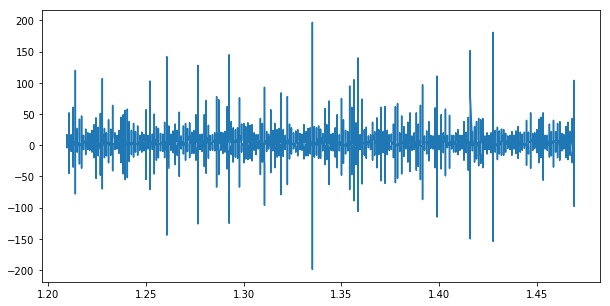

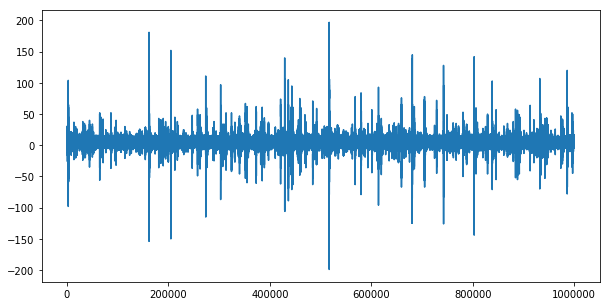

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df['ttf'], df['s'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df['s'])
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
Feature(df['s'][:1000], '../../data/').r_savgol_filter(window_length=11).data

	 Rolling decorator for r_savgol_filter: 


,"r_savgol_filter(self, window_length=11, (window_length=101, polyorder=1))"
0,9.681818
1,8.945455
2,8.209091
3,7.472727
4,6.736364
5,6.000000
6,5.090909
7,4.727273
8,4.272727
9,3.727273


In [109]:
signal1 = Feature(df['s'][:150000], '../../data/').r_savgol_filter(window_length=11).data.values.squeeze()

	 Rolling decorator for r_savgol_filter: 


In [112]:
model = ARIMA(signal1, order=(1,0,2))
model_fit = model.fit(disp=0, trend='c')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:               150000
Model:                     ARMA(1, 2)   Log Likelihood              -97721.077
Method:                       css-mle   S.D. of innovations              0.464
Date:                Fri, 12 Apr 2019   AIC                         195452.153
Time:                        01:26:37   BIC                         195501.745
Sample:                             0   HQIC                        195466.934
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8842      0.031    155.138      0.000       4.822       4.946
ar.L1.y        0.9102      0.001    823.408      0.000       0.908       0.912
ma.L1.y        0.9024      0.002    403.903      0.0

In [113]:
signal2 = Feature(df['s'][150000:300000], '../../data/').r_savgol_filter(window_length=11).data.values.squeeze()

	 Rolling decorator for r_savgol_filter: 


In [114]:
model = ARIMA(signal2, order=(1,0,2))
model_fit = model.fit(disp=0, trend='c')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:               150000
Model:                     ARMA(1, 2)   Log Likelihood             -118039.899
Method:                       css-mle   S.D. of innovations              0.532
Date:                Fri, 12 Apr 2019   AIC                         236089.799
Time:                        01:27:36   BIC                         236139.391
Sample:                             0   HQIC                        236104.579
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7260      0.051     93.330      0.000       4.627       4.825
ar.L1.y        0.9306      0.001    963.507      0.000       0.929       0.932
ma.L1.y        1.0027      0.002    497.468      0.0

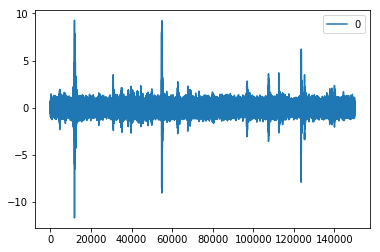

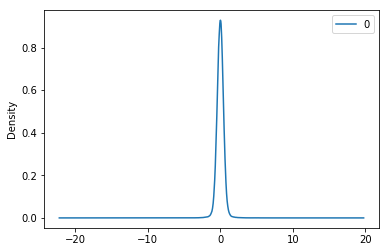

                  0
count  1.500000e+05
mean   3.743257e-07
std    5.315196e-01
min   -1.169994e+01
25%   -2.885678e-01
50%    1.657614e-03
75%    2.872958e-01
max    9.271951e+00


In [115]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [107]:
signal = Feature(df['s'][:100003], '../../data/').r_savgol_filter(window_length=11).data.values.squeeze()

	 Rolling decorator for r_savgol_filter: 


In [103]:
output = model_fit.predict()
output_forecasted = list(output)
output_forecasted.extend(list(model_fit.forecast(steps=3)[0]))

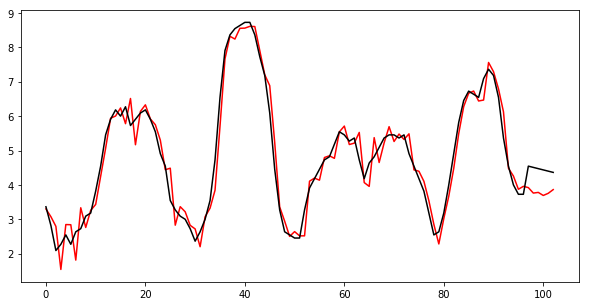

In [108]:
output = model_fit.predict()
plt.figure(figsize=(10, 5))
plt.plot(output_forecasted[99900:], 'r')
plt.plot(signal[99900:], 'k')
plt.show()